<a href="https://colab.research.google.com/github/Anna-Tereshchuk/Data-Engineering-Notebooks/blob/main/data_simple_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataFrame**  у pandas - це двовимірна структура даних, схожа на двовимірний масив або таблицю з рядками та стовпцями.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Bike Sharing.csv', encoding='latin1')
print(df)




      ID        Date  Season  Year  Month  Holiday  Weekday  Working Day  \
0      1  01-01-2011       1     0      1        0        6            0   
1      2  02-01-2011       1     0      1        0        0            0   
2      3  03-01-2011       1     0      1        0        1            1   
3      4  04-01-2011       1     0      1        0        2            1   
4      5  05-01-2011       1     0      1        0        3            1   
..   ...         ...     ...   ...    ...      ...      ...          ...   
726  727  27-12-2012       1     1     12        0        4            1   
727  728  28-12-2012       1     1     12        0        5            1   
728  729  29-12-2012       1     1     12        0        6            0   
729  730  30-12-2012       1     1     12        0        0            0   
730  731  31-12-2012       1     1     12        0        1            1   

     Weather      Temp     Temp©  Humidity  Windspeed  Casual Rider  \
0          2  0.

In [89]:
print(df.head(20).to_string())

    ID        Date  Season  Year  Month  Holiday  Weekday  Working Day  Weather      Temp     Temp©  Humidity  Windspeed  Casual Rider  Registered Rider  Total Rider
0    1  01-01-2011       1     0      1        0        6            0        2  0.344167  0.363625  0.805833   0.160446           331               654          985
1    2  02-01-2011       1     0      1        0        0            0        2  0.363478  0.353739  0.696087   0.248539           131               670          801
2    3  03-01-2011       1     0      1        0        1            1        1  0.196364  0.189405  0.437273   0.248309           120              1229         1349
3    4  04-01-2011       1     0      1        0        2            1        1  0.200000  0.212122  0.590435   0.160296           108              1454         1562
4    5  05-01-2011       1     0      1        0        3            1        1  0.226957  0.229270  0.436957   0.186900            82              1518         1600
5   

In [90]:
# Перетворення стовпця Date у формат datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [91]:
# Перевірка на некоректні дати
if df['Date'].isna().any():
    print("Увага! Деякі значення у стовпці 'Date' некоректні та будуть видалені.")
    df = df.dropna(subset=['Date'])

Увага! Деякі значення у стовпці 'Date' некоректні та будуть видалені.


In [103]:
# Уникнення конфлікту типів через .copy()
df = df.copy()

# Додавання нового стовпця з типом Period[M]
df['Month'] = df['Date'].dt.to_period('M')



In [104]:
# Групування даних за місяцями і обчислення суми для 'Total Rider'
if 'Total Rider' in df.columns:
    monthly_riders = df.groupby('Month')['Total Rider'].sum()

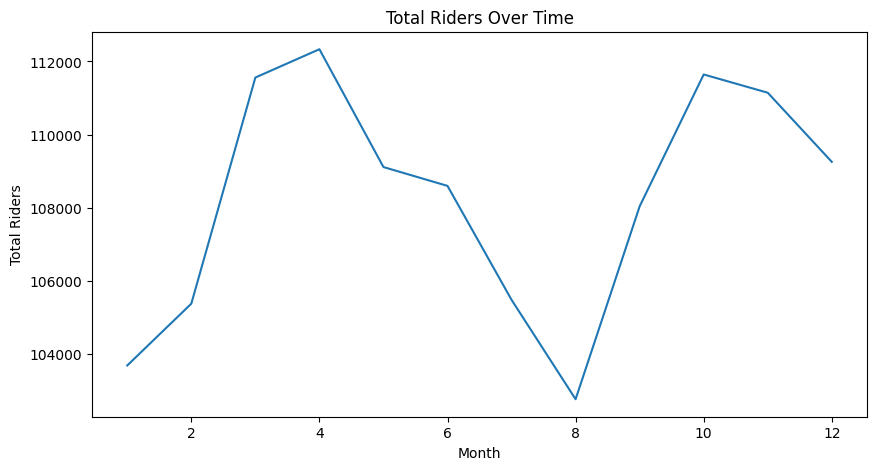

In [107]:
# Створення незалежної копії
df = df.copy()

# Додавання нового стовпця з місяцями
df['Month'] = df['Date'].dt.month

# Групування даних за місяцями
monthly_riders = df.groupby('Month')['Total Rider'].sum()

# Побудова графіка
monthly_riders.plot(kind='line', figsize=(10, 5))
plt.xlabel('Month')
plt.ylabel('Total Riders')
plt.title('Total Riders Over Time')
plt.show()



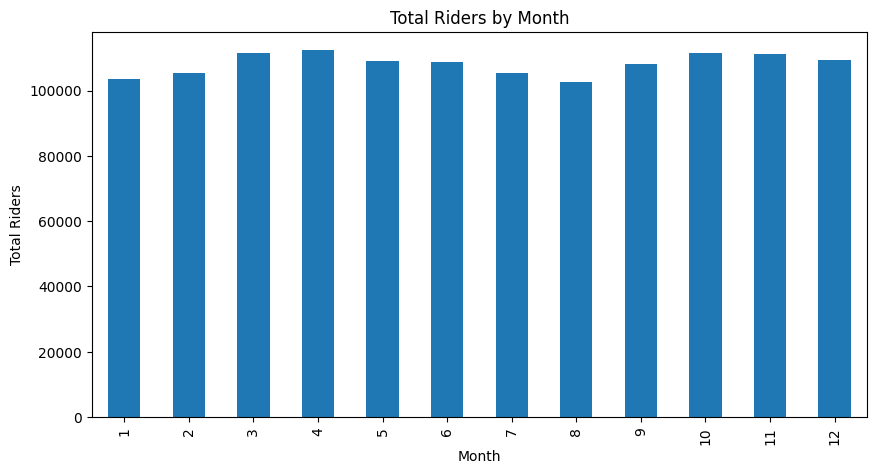

In [108]:
# Графік 2: Стовпчиковий графік загальної кількості користувачів за місяцями
df['Month'] = df['Date'].dt.month
monthly_riders = df.groupby('Month')['Total Rider'].sum()
plt.figure(figsize=(10, 5))
monthly_riders.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Riders')
plt.title('Total Riders by Month')
plt.show()

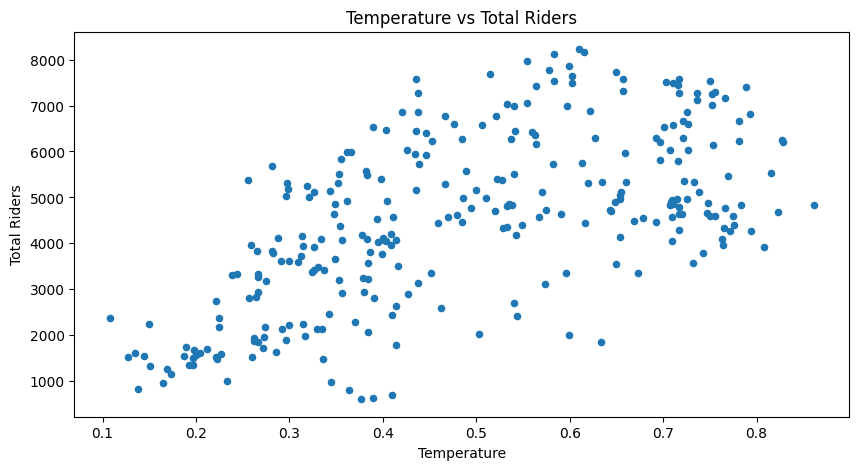

In [109]:
# Графік 3: Діаграма розсіювання температури та загальної кількості користувачів
plt.figure(figsize=(10, 5))
df.plot(x='Temp', y='Total Rider', kind='scatter', ax=plt.gca())
plt.xlabel('Temperature')
plt.ylabel('Total Riders')
plt.title('Temperature vs Total Riders')
plt.show()

In [97]:
print(df['Weather'].unique())


[2 1 3]


In [98]:
df['Weather'] = df['Weather'].map(weather_labels)
print(df['Weather'].unique())


['Хмарно' 'Сонячно' 'Дощ']


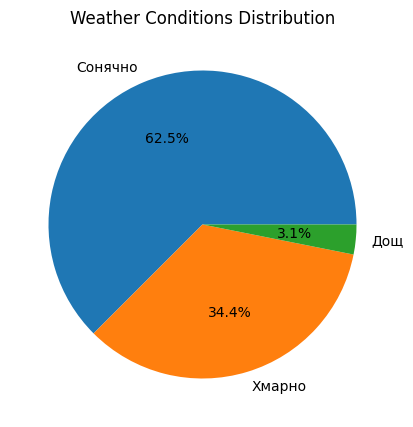

In [99]:
# Графік 4: Кругова діаграма розподілу погодних умов
weather_counts = df['Weather'].value_counts()
plt.figure(figsize=(10, 5))
weather_counts.plot.pie(autopct='%1.1f%%')
plt.title('Weather Conditions Distribution')
plt.ylabel('')
plt.show()



